<a href="https://colab.research.google.com/github/RizzlaRozza/18005152_DataAnalytics/blob/main/DnnRegressionTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# needed to create the data frame
import pandas as pd


# import data from github and create a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/RizzlaRozza/18005152_DataAnalytics/main/crimes_nndata.csv', index_col=0)

In [2]:
# check data has been imported successfully
print(df[:20])

    Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  ...  Saturday  Sunday  \
1     0    0    0    0    1    0    0    0    0    0  ...         0       0   
2     0    0    0    0    1    0    0    0    0    0  ...         0       0   
3     0    0    0    0    1    0    0    0    0    0  ...         0       0   
4     0    0    0    0    1    0    0    0    0    0  ...         1       0   
5     0    0    0    0    1    0    0    0    0    0  ...         0       1   
6     0    0    0    0    1    0    0    0    0    0  ...         0       0   
7     0    0    0    0    1    0    0    0    0    0  ...         0       0   
8     0    0    0    0    1    0    0    0    0    0  ...         0       0   
9     0    0    0    0    1    0    0    0    0    0  ...         0       0   
10    0    0    0    0    1    0    0    0    0    0  ...         0       0   
11    0    0    0    0    1    0    0    0    0    0  ...         1       0   
12    0    0    0    0    1    0    0    0    0    0

In [3]:
# needed to help with speedy maths based calculations
import numpy as np

# Shuffle the rows
shuffle = df.iloc[np.random.permutation(len(df))]

# we are selecting all rows of the columns outliined i.e. The 3rd (2 as indexes start from 0)
predictors = shuffle.iloc[:,0:21]
# Since it is the last column, we can also use
# predictorTest = shuffle.iloc[:,-1]

# print out the first 6 rows of predictors.
print(predictors[:20])

     Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  ...  Sep  Friday  \
390    0    0    0    1    0    0    0    0    0    0  ...    0       0   
654    0    0    0    0    0    0    0    0    0    0  ...    0       0   
185    0    0    0    0    0    1    0    0    0    0  ...    0       0   
468    1    0    0    0    0    0    0    0    0    0  ...    0       0   
28     0    0    0    0    1    0    0    0    0    0  ...    0       0   
608    0    0    0    0    0    0    0    0    0    0  ...    1       0   
313    0    0    0    0    0    0    0    0    0    1  ...    0       0   
295    0    0    0    0    0    0    0    0    0    1  ...    0       0   
279    0    0    0    0    0    0    0    0    0    0  ...    0       0   
348    0    0    1    0    0    0    0    0    0    0  ...    0       0   
36     0    0    0    1    0    0    0    0    0    0  ...    0       0   
51     0    0    0    1    0    0    0    0    0    0  ...    0       0   
376    0    0    0    0  

In [4]:
# print out the shuffled data (first 5 rows)
shuffle[:5]

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Saturday,Sunday,Thusday,Tuesday,Wednesday,year,temp,TOTAL_CRIMES,BAR_TAVERN,BATTERY
390,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2021,27.6,0.167742,0.000000,0.056000
654,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2021,60.1,0.604301,0.545455,0.472000
185,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,2019,66.8,0.837945,0.142857,0.593103
468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2021,48.1,0.587097,0.045455,0.544000
28,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,2019,33.8,0.302372,0.085714,0.041379


In [5]:
# Declare a constant
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_TOTAL_CRIMES_1 = 506; # multiply
SCALE_TOTAL_CRIMES_2 = 341; # add

SCALE_BATTERY_CRIMES_1 = 145; # multiply 
SCALE_BATTERY_CRIMES_2 = 78; # add

SCALE_BAR_CRIMES_1 = 35; # multiply



# Total Crimes Test

In [56]:
# Select all rows for the 2nd column (i.e. 1)
targets = shuffle.iloc[:,21]

# print out the first 6 rows of the targets data.
print(targets[:6])

214    0.832016
13     0.581028
557    0.655914
498    0.365591
274    0.681818
248    0.869565
Name: TOTAL_CRIMES, dtype: float64


In [50]:
# Split our data into a training set i.e. 80% of the length of the shuffle array
trainsize = int(len(shuffle['TOTAL_CRIMES'])*0.8)
# The test set size is 100% - 80% = 20% of the length of the shuffle array.
testsize = len(shuffle['TOTAL_CRIMES']) - trainsize

# Define the number of input values (predictors)
nppredictors = 20
# Define the number of output values (targets)
noutputs = 1

In [ ]:
# import tensorflow
%tensorflow_version 1.x
import tensorflow as tf

# check the version
print(tf.__version__)

# needed for high-level file management
import shutil  

# logging for tensorflow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

# removes a saved model from the last training attempt.
shutil.rmtree('/tmp/DNN_house_regression_trained_model_TOTAL_CRIMES', ignore_errors=True)

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_TOTAL_CRIMES', hidden_units=[20,18,14], optimizer=tf.train.AdamOptimizer(learning_rate=0.01), enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values)))

# Prints a log to show model is starting to train
print("starting to train");

# Train the model. Pass in predictor values and target values.
estimator.fit(predictors[:trainsize].values, targets[:trainsize].values.reshape(trainsize, noutputs), steps=10000)

# Next, we can check our predictions based on our predictors.
preds = estimator.predict(x=predictors[trainsize:].values)

# Apply the Scale value (not really needed here) to the outputs.
predslistscale = preds['scores']*SCALE_TOTAL_CRIMES_1 + SCALE_TOTAL_CRIMES_2;

# pred = format(str(predslistscale)) # useful for checking outputs and printing.

# Calculate RMSE i.e. how good the model works using the predictions and targets.
# i.e. take the difference between the actual and the forecast then square the difference, 
# find the average of all the squares and then find the square root. 
# The RMSE essentially punishes larger errors i.e. it puts a heavier weight on larger errors.
rmse = np.sqrt(np.mean((targets[trainsize:].values - predslistscale)**2))
print('DNNRegression has RMSE of {0}'.format(rmse));


# Calculate the mean of the Life Satisfaction Values.
avg = np.mean(shuffle['TOTAL_CRIMES'][:trainsize])

# Calculate the RMSE using Life Satisfaction Values and the mean of all target values.
# The fit of a proposed regression model should therefore be better than the fit of the mean model.
# In this case, it doesn't seem to be the case but it will vary on every run.
rmse = np.sqrt(np.mean((shuffle['TOTAL_CRIMES'][trainsize:] - avg)**2))
print('Just using average = {0} has RMSE of {1}'.format(avg, rmse));

In [57]:
#"Apr","Aug","Dec","Feb","Jan","Jul","Jun","Mar","May","Nov","Oct","Sep","Friday","Monday","Saturday","Sunday","Thusday","Tuesday","Wednesday","year","temp","TOTAL_CRIMES"

input = pd.DataFrame.from_dict(data = 
				{
         'Apr' : [0,0,1],
         'Aug' : [1,0,0],
         'Dec' : [0,1,0],
         'Feb' : [0,0,0],
         'Jan' : [0,0,0],
         'Jul' : [0,0,0],
         'Jun' : [0,0,0],
         'Mar' : [0,0,0],
         'May' : [0,0,0],
         'Nov' : [0,0,0],
         'Oct' : [0,0,0],
         'Sep' : [0,0,0],
         'Friday' : [0,0,0],
         'Monday' : [1,1,1],
         'Saturday' : [0,0,0],
         'Sunday' : [0,0,0],
         'Thusday' : [0,0,0],
         'Tuesday' : [0,0,0],
         'Wednesday' : [0,0,0],
         'year' : [2019,2019,2021],
         'temp' : [61.8, 31.2, 40.0]
        })

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_TOTAL_CRIMES', hidden_units=[20,18,14], enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)))

preds = estimator.predict(x=input.values)

predslistnorm = preds['scores']
predslistscale = preds['scores']*506+341;
prednorm = format(str(predslistnorm))
pred = format(str(predslistscale))
print(prednorm)
print(pred)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3585f78d50>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/DNN_house_regression_trained_model/mo

# Total Crimes predictions by Month

In [64]:
# Splitting the year into 4 seasons, with varying days of the week, mar-may, dec-feb, sep-nov, jun-aug, 7 random dates from each period chosen
input = pd.DataFrame.from_dict(data = 
				{
         'Apr' : [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Aug' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
         'Dec' : [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Feb' : [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jan' : [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jul' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0],
         'Jun' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0],
         'Mar' : [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'May' : [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Nov' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
         'Oct' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
         'Sep' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
         'Friday' :     [0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
         'Monday' :     [1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],
         'Saturday' :   [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
         'Sunday' :     [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],
         'Thusday' :    [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0],
         'Tuesday' :    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
         'Wednesday' :  [0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0],
         'year' : [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019],
         'temp' : [39.0, 29.0, 46.5, 35.2, 42.5, 49.0, 32.5, 21.4, 32.4, 22.4, 23.4, 25.4, 29.4, 35.4, 60.0, 51.0, 67.2, 72.9, 63.8, 81.9, 78.1, 68.8, 70.4, 60.7, 75.2, 64.6, 63.6, 72.8]
        })

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_TOTAL_CRIMES', hidden_units=[20,18,14], enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)))

preds = estimator.predict(x=input.values)

predslistnorm = preds['scores']
predslistscale = preds['scores']*SCALE_TOTAL_CRIMES_1 + SCALE_TOTAL_CRIMES_2;
prednorm = format(str(predslistnorm))
pred = format(str(predslistscale))
print(prednorm)
print(pred)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3586833410>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/DNN_house_regression_trained_model/mo

Summary:

From the data above, 7 days were picked from each season (mar-may, dec-feb, sep-nov, jun-aug), one for each day of the week...
Its apparent that temperature has a large impact on Total Crime numbers.

-----------------------------------

Season 1 - mar-may 
  (average = 570 daily crimes)

  566.5111,  545.8947,  573.0728,  551.45264, 583.639,   586.79895, 585.7214

  During the first season, the temperatures entered are fairly average for that time of year and as a result the no of crimes fluxute around an average of 570, with the highest numbers returned on Saturday and Sunday.  It is likely the day of the week that has influenced this stat.

  -----------------------------------

Season 2 - dec-feb 
  (average = 543 daily crimes)

  545.81055, 558.3742,  542.10266, 523.2186,  553.49243, 542.6095,  538.7477

  During the second season, the temperatures entered are again fairly average for that time of year and as a result the no of crimes fluxute around an average of 543, with the high numbers seeming to appear randomly through the week.  It is likely that during this colder season, the temperature has more of an effect on the total crime numbers than the day of the week.

  Temps entered: 21.4, 32.4, 22.4, 23.4, 25.4, 29.4, 35.4

  -----------------------------------

Season 3 - sep-nov 
  (average = 638 daily crimes)

  631.7812  612.7451  637.8678  633.82166 646.5581  659.5379  640.19244

  Season 3 shows the highest numbers appearing on Friday, Saturday and Sunday, which looks like the day of the week has a much higher impact on number on daily crimes when the temperature is higher overall.

  -----------------------------------

Season 4 - jun-aug 
  (average = 650 daily crimes)

  650.67914, 648.39075, 632.263,   651.40656, 662.1024,  650.73413, 651.9282

  At the tail end of the warm season, it appears that the total number of crimes is impacted less by the temperature and slightly more by the day of the week.  The highest numbers are returned on Friday, Sunday, Thursday and Saturday.




The data entered has all been for 2019's data.  Althought the 2021 trend shows there there are less crimes committed daily overall, it may be prudent to enter the temperatures and days of the week for 2021s data, but instead make predictions using 2019 as a test.

I would expect to see slightly less crimes each day in reality compared to the predictions but regardless, this should return some interesting data.

# Total Crimes - predictions of 2019s crime stats using 2019's data

Test data entered with predicted outcomes:
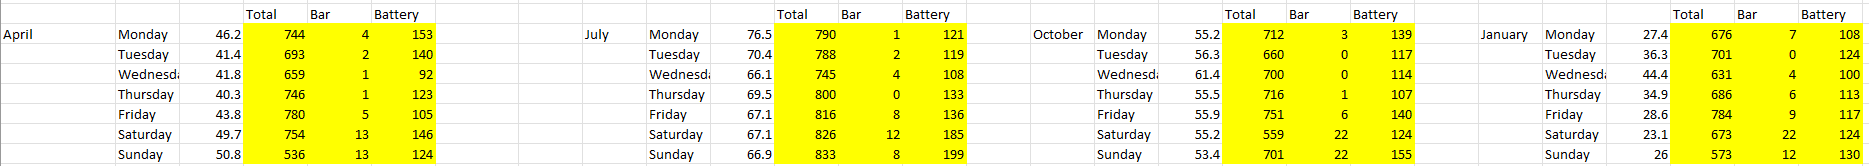![image.png]()

In [89]:
# Splitting the year into 4 seasons, with varying days of the week, mar-may, dec-feb, sep-nov, jun-aug, 7 random dates from each period chosen
input = pd.DataFrame.from_dict(data = 
				{
         'Apr' : [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Aug' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Dec' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Feb' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jan' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1],
         'Jul' : [0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jun' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Mar' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'May' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Nov' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Oct' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
         'Sep' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Friday' :     [0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
         'Monday' :     [1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],
         'Saturday' :   [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
         'Sunday' :     [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],
         'Thusday' :    [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0],
         'Tuesday' :    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
         'Wednesday' :  [0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0],
         'year' : [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019],
         'temp' : [46.2, 41.4, 41.8, 40.3, 43.8, 49.7, 50.8, 76.5, 70.4, 66.1, 69.5, 67.1, 67.1, 66.9, 55.2,56.3,61.4,55.5,55.9,55.2,53.4,27.4,36.3,44.4,34.9,28.6,23.1,26.0 ]
        })

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_TOTAL_CRIMES', hidden_units=[20,18,14], enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)))

preds = estimator.predict(x=input.values)

predslistnorm = preds['scores']
predslistscale = preds['scores']*SCALE_TOTAL_CRIMES_1 + SCALE_TOTAL_CRIMES_2;
prednorm = format(str(predslistnorm))
pred = format(str(predslistscale))
print(prednorm)
print(pred)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f35884b49d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/DNN_house_regression_trained_model/mo

Compare actual data with the predicted data shows:

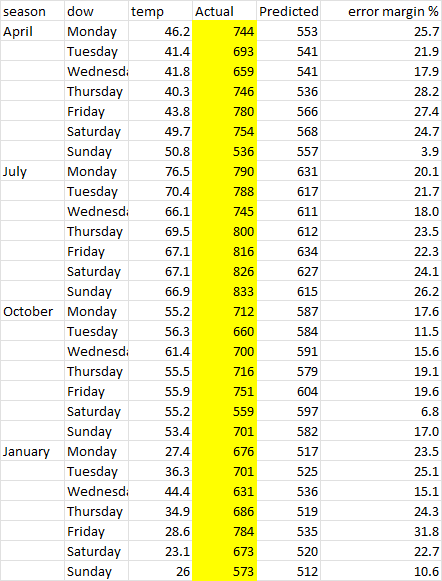

# Bar / Tavern Crimes Predictions

In [79]:
# Select all rows for the 2nd column (i.e. 1)
targets = shuffle.iloc[:,22]

# print out the first 6 rows of the targets data.
print(targets[:6])

202    0.000000
304    0.028571
189    0.028571
239    0.200000
664    0.000000
299    0.285714
Name: BAR_TAVERN, dtype: float64


In [81]:
# Split our data into a training set i.e. 80% of the length of the shuffle array
trainsize = int(len(shuffle['BAR_TAVERN'])*0.8)
# The test set size is 100% - 80% = 20% of the length of the shuffle array.
testsize = len(shuffle['BAR_TAVERN']) - trainsize

# Define the number of input values (predictors)
nppredictors = 20
# Define the number of output values (targets)
noutputs = 1

In [82]:
# import tensorflow
%tensorflow_version 1.x
import tensorflow as tf

# check the version
print(tf.__version__)

# needed for high-level file management
import shutil  

# logging for tensorflow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

# removes a saved model from the last training attempt.
shutil.rmtree('/tmp/DNN_house_regression_trained_model_BAR', ignore_errors=True)

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_BAR', hidden_units=[20,18,14], optimizer=tf.train.AdamOptimizer(learning_rate=0.01), enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values)))

# Prints a log to show model is starting to train
print("starting to train");

# Train the model. Pass in predictor values and target values.
estimator.fit(predictors[:trainsize].values, targets[:trainsize].values.reshape(trainsize, noutputs), steps=10000)

# Next, we can check our predictions based on our predictors.
preds = estimator.predict(x=predictors[trainsize:].values)

# Apply the Scale value (not really needed here) to the outputs.
predslistscale = preds['scores']*SCALE_BAR_CRIMES_1;

# pred = format(str(predslistscale)) # useful for checking outputs and printing.

# Calculate RMSE i.e. how good the model works using the predictions and targets.
# i.e. take the difference between the actual and the forecast then square the difference, 
# find the average of all the squares and then find the square root. 
# The RMSE essentially punishes larger errors i.e. it puts a heavier weight on larger errors.
rmse = np.sqrt(np.mean((targets[trainsize:].values - predslistscale)**2))
print('DNNRegression has RMSE of {0}'.format(rmse));


# Calculate the mean of the Life Satisfaction Values.
avg = np.mean(shuffle['BAR_TAVERN'][:trainsize])

# Calculate the RMSE using Life Satisfaction Values and the mean of all target values.
# The fit of a proposed regression model should therefore be better than the fit of the mean model.
# In this case, it doesn't seem to be the case but it will vary on every run.
rmse = np.sqrt(np.mean((shuffle['BAR_TAVERN'][trainsize:] - avg)**2))
print('Just using average = {0} has RMSE of {1}'.format(avg, rmse));

1.15.2
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f35885bd8d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model_BAR', '_session_creation_timeout_secs': 7200}
starting to train
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensor

In [83]:
#"Apr","Aug","Dec","Feb","Jan","Jul","Jun","Mar","May","Nov","Oct","Sep","Friday","Monday","Saturday","Sunday","Thusday","Tuesday","Wednesday","year","temp","BAR_TAVERN"

input = pd.DataFrame.from_dict(data = 
				{
         'Apr' : [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Aug' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
         'Dec' : [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Feb' : [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jan' : [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jul' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0],
         'Jun' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0],
         'Mar' : [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'May' : [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Nov' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
         'Oct' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
         'Sep' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
         'Friday' :     [0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
         'Monday' :     [1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],
         'Saturday' :   [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
         'Sunday' :     [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],
         'Thusday' :    [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0],
         'Tuesday' :    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
         'Wednesday' :  [0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0],
         'year' : [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019],
         'temp' : [39.0, 29.0, 46.5, 35.2, 42.5, 49.0, 32.5, 21.4, 32.4, 22.4, 23.4, 25.4, 29.4, 35.4, 60.0, 51.0, 67.2, 72.9, 63.8, 81.9, 78.1, 68.8, 70.4, 60.7, 75.2, 64.6, 63.6, 72.8]
        })

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_BAR', hidden_units=[20,18,14], enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)))

preds = estimator.predict(x=input.values)

predslistnorm = preds['scores']
predslistscale = preds['scores']*SCALE_BAR_CRIMES_1;
prednorm = format(str(predslistnorm))
pred = format(str(predslistscale))
print(prednorm)
print(pred)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3585f84890>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model_BAR', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/DNN_house_regression_trained_mode

# Battery Crimes

In [74]:
# Select all rows for the 2nd column (i.e. 1)
targets = shuffle.iloc[:,23]

# print out the first 6 rows of the targets data.
print(targets[:6])

202    0.572414
304    0.055172
189    0.517241
239    0.689655
664    0.216000
299    0.379310
Name: BATTERY, dtype: float64


In [75]:
# Declare a constant
SCALE_TOTAL_CRIMES = 1.0

In [76]:
# Split our data into a training set i.e. 80% of the length of the shuffle array
trainsize = int(len(shuffle['BATTERY'])*0.8)
# The test set size is 100% - 80% = 20% of the length of the shuffle array.
testsize = len(shuffle['BATTERY']) - trainsize

# Define the number of input values (predictors)
nppredictors = 20
# Define the number of output values (targets)
noutputs = 1

In [84]:
# import tensorflow
%tensorflow_version 1.x
import tensorflow as tf

# check the version
print(tf.__version__)

# needed for high-level file management
import shutil  

# logging for tensorflow
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

# removes a saved model from the last training attempt.
shutil.rmtree('/tmp/DNN_house_regression_trained_model_BATTERY', ignore_errors=True)

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_BATTERY', hidden_units=[20,18,14], optimizer=tf.train.AdamOptimizer(learning_rate=0.01), enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values)))

# Prints a log to show model is starting to train
print("starting to train");

# Train the model. Pass in predictor values and target values.
estimator.fit(predictors[:trainsize].values, targets[:trainsize].values.reshape(trainsize, noutputs)/SCALE_TOTAL_CRIMES, steps=10000)

# Next, we can check our predictions based on our predictors.
preds = estimator.predict(x=predictors[trainsize:].values)

# Apply the Scale value (not really needed here) to the outputs.
predslistscale = preds['scores']*SCALE_BATTERY_CRIMES_1 + SCALE_BATTERY_CRIMES_2;

# pred = format(str(predslistscale)) # useful for checking outputs and printing.

# Calculate RMSE i.e. how good the model works using the predictions and targets.
# i.e. take the difference between the actual and the forecast then square the difference, 
# find the average of all the squares and then find the square root. 
# The RMSE essentially punishes larger errors i.e. it puts a heavier weight on larger errors.
rmse = np.sqrt(np.mean((targets[trainsize:].values - predslistscale)**2))
print('DNNRegression has RMSE of {0}'.format(rmse));


# Calculate the mean of the Life Satisfaction Values.
avg = np.mean(shuffle['BATTERY'][:trainsize])

# Calculate the RMSE using Life Satisfaction Values and the mean of all target values.
# The fit of a proposed regression model should therefore be better than the fit of the mean model.
# In this case, it doesn't seem to be the case but it will vary on every run.
rmse = np.sqrt(np.mean((shuffle['BATTERY'][trainsize:] - avg)**2))
print('Just using average = {0} has RMSE of {1}'.format(avg, rmse));

1.15.2
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f358cb77110>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model_BATTERY', '_session_creation_timeout_secs': 7200}
starting to train
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:te

In [85]:
#"Apr","Aug","Dec","Feb","Jan","Jul","Jun","Mar","May","Nov","Oct","Sep","Friday","Monday","Saturday","Sunday","Thusday","Tuesday","Wednesday","year","temp","BAR_TAVERN"

input = pd.DataFrame.from_dict(data = 
				{
         'Apr' : [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Aug' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
         'Dec' : [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Feb' : [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jan' : [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Jul' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0],
         'Jun' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0],
         'Mar' : [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'May' : [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         'Nov' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
         'Oct' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
         'Sep' : [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
         'Friday' :     [0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
         'Monday' :     [1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],
         'Saturday' :   [0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
         'Sunday' :     [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1],
         'Thusday' :    [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0],
         'Tuesday' :    [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
         'Wednesday' :  [0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0],
         'year' : [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019],
         'temp' : [39.0, 29.0, 46.5, 35.2, 42.5, 49.0, 32.5, 21.4, 32.4, 22.4, 23.4, 25.4, 29.4, 35.4, 60.0, 51.0, 67.2, 72.9, 63.8, 81.9, 78.1, 68.8, 70.4, 60.7, 75.2, 64.6, 63.6, 72.8]
        })

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNRegressor(model_dir='/tmp/DNN_house_regression_trained_model_BATTERY', hidden_units=[20,18,14], enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)))

preds = estimator.predict(x=input.values)

predslistnorm = preds['scores']
predslistscale = preds['scores']*SCALE_BATTERY_CRIMES_1 + SCALE_BATTERY_CRIMES_2;
prednorm = format(str(predslistnorm))
pred = format(str(predslistscale))
print(prednorm)
print(pred)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f35881838d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/DNN_house_regression_trained_model_BATTERY', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/DNN_house_regression_trained_